In [1]:
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 21.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 1.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 14.3 MB/s eta 0:00:00


/tmp/ipykernel_99/1526817990.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['Folder'] = folder
/tmp/ipykernel_99/1526817990.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['Folder'] = folder
/tmp/ipykernel_99/1526817990.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

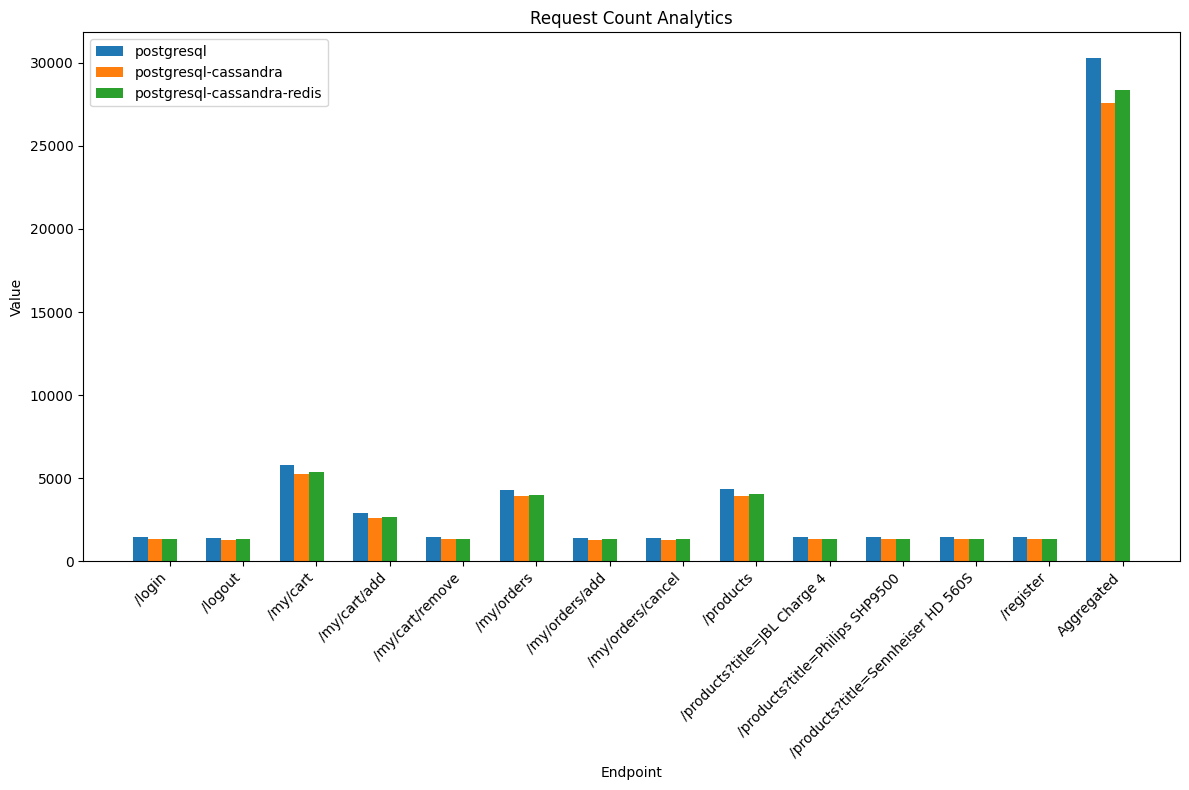

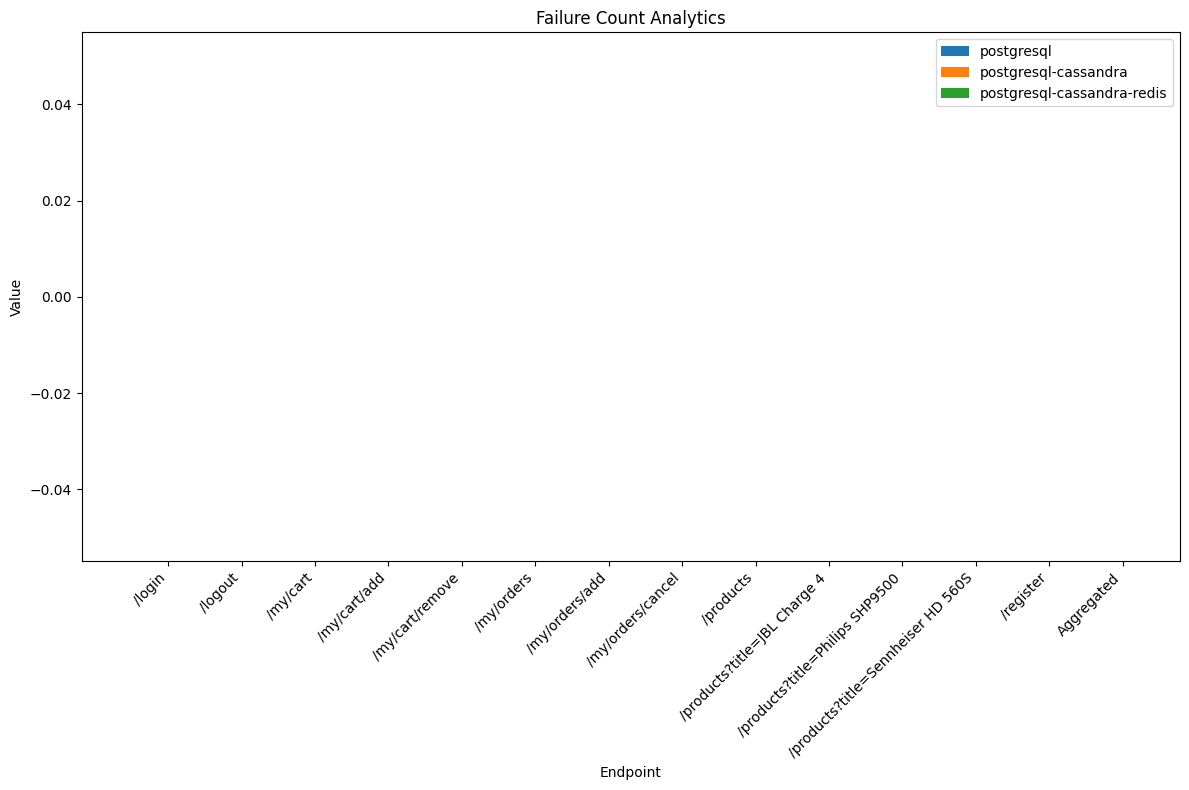

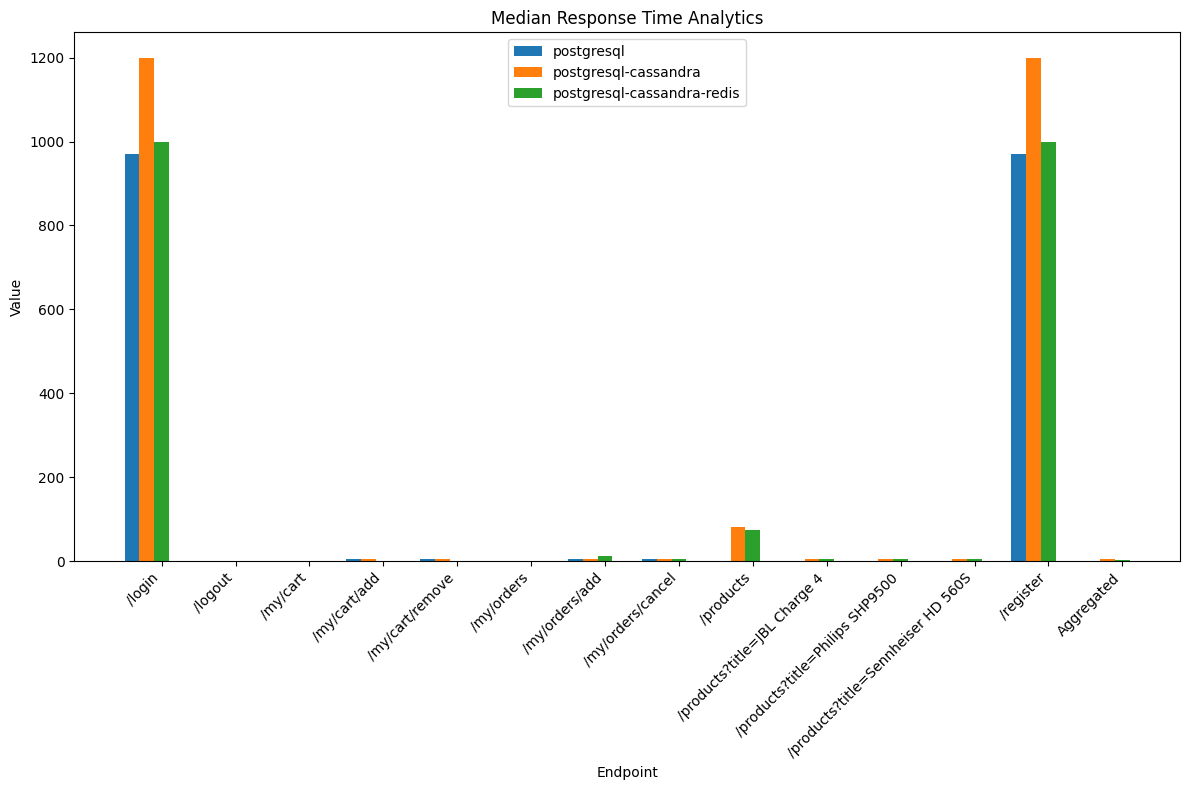

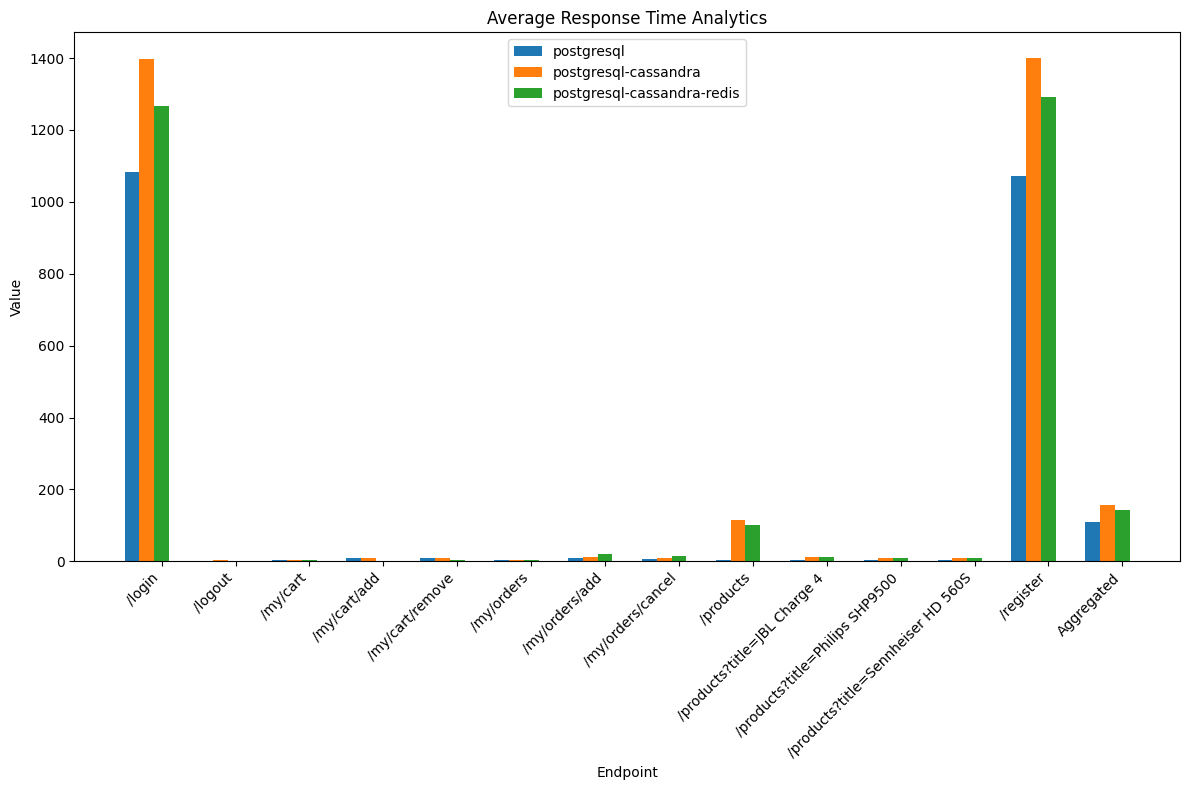

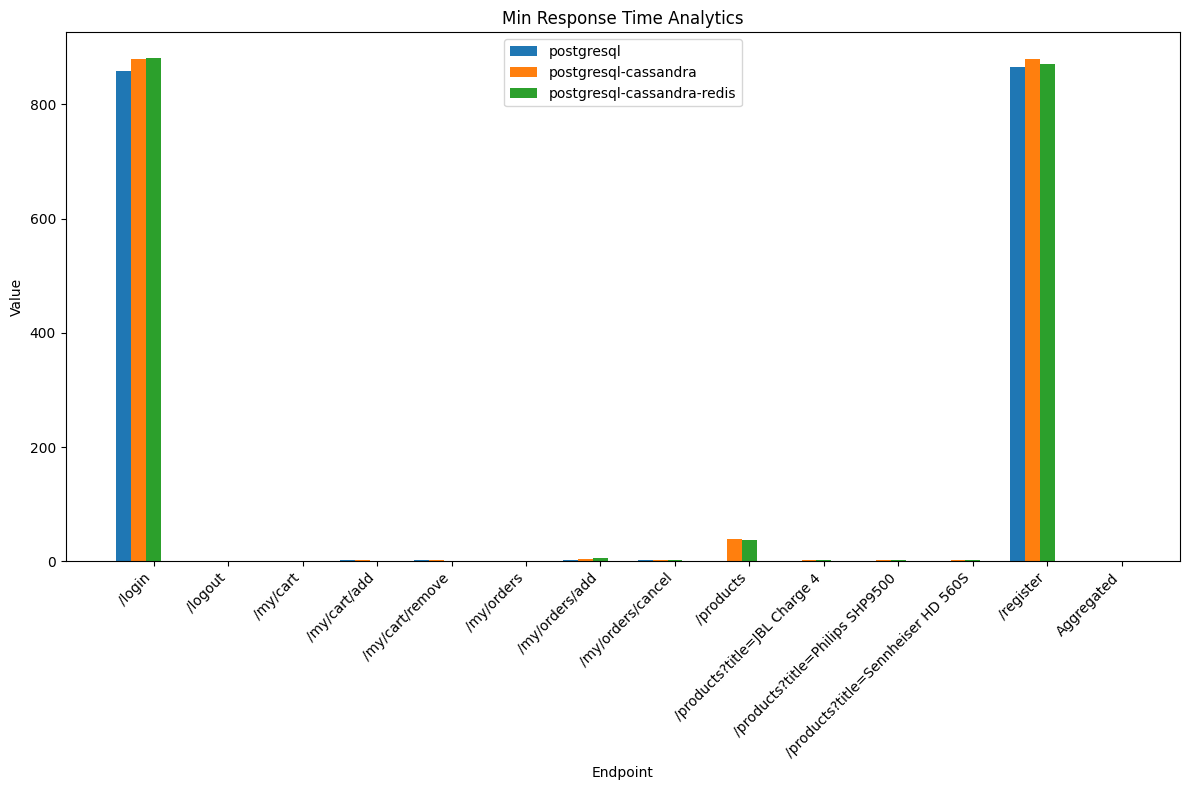

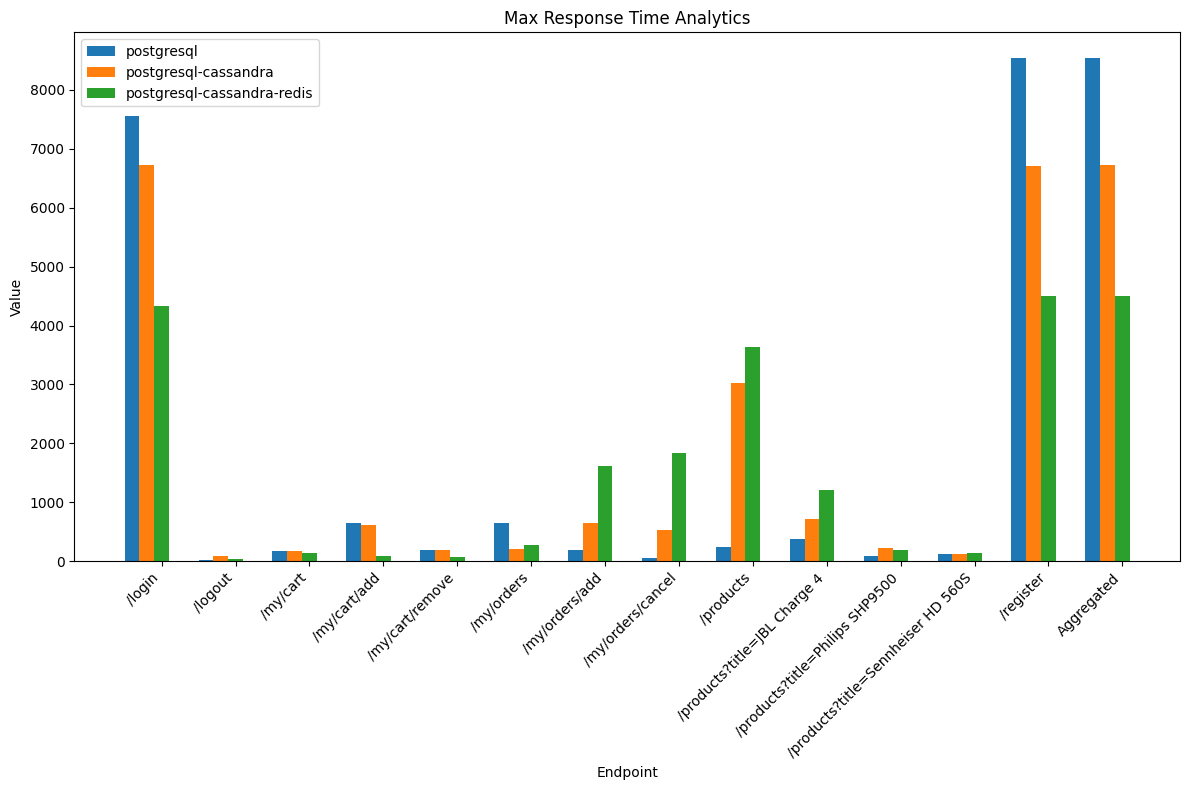

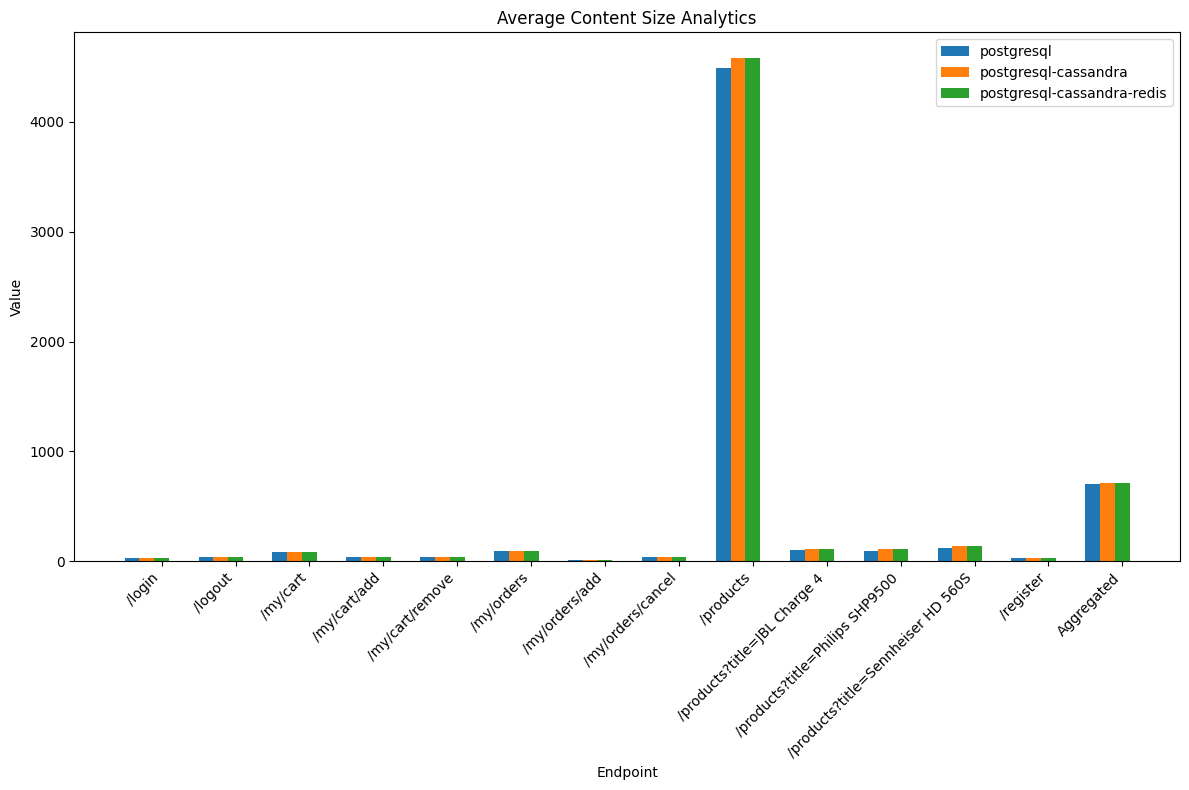

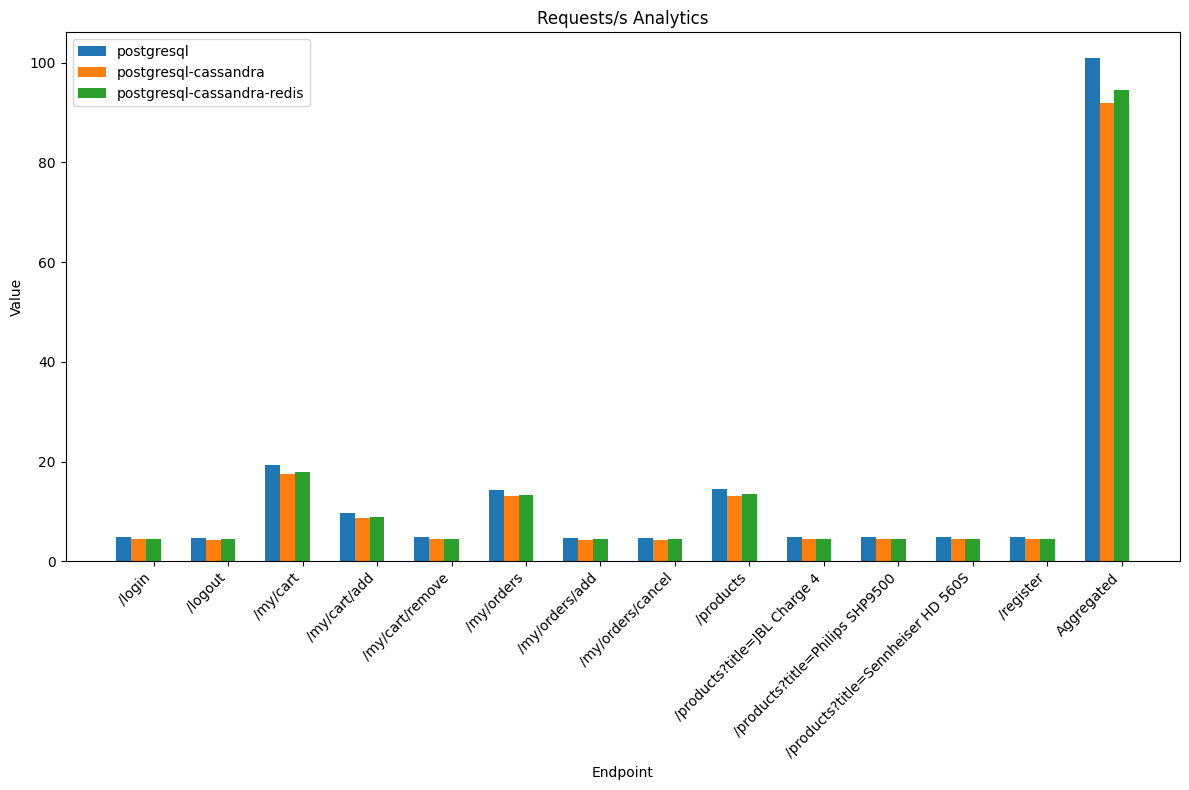

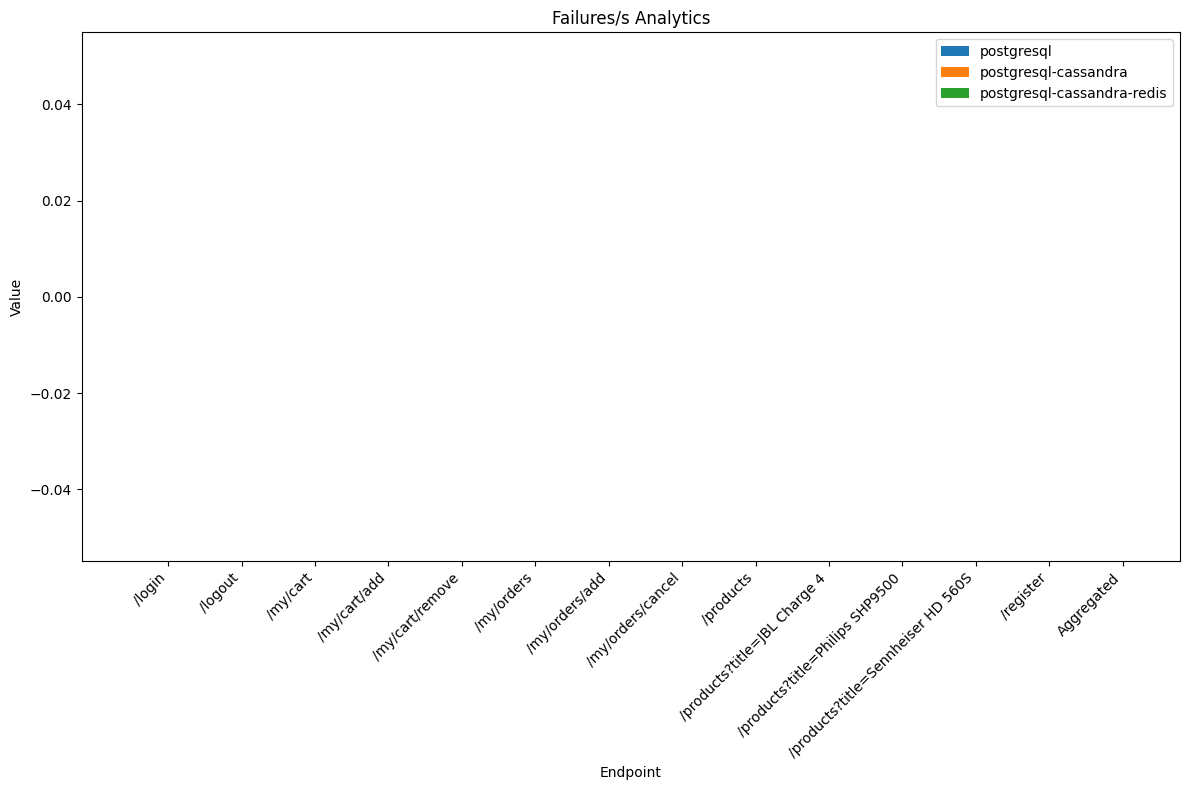

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folders
folders = ['postgresql', 'postgresql-cassandra', 'postgresql-cassandra-redis']

# Define metrics
metrics = ['Request Count', 'Failure Count', 'Median Response Time', 'Average Response Time', 'Min Response Time', 'Max Response Time', 'Average Content Size', 'Requests/s', 'Failures/s']

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each folder
for folder in folders:
    folder_path = os.path.join(os.getcwd(), f"stats/{folder}")
    
    # Read the stats_stats.csv file for each folder
    csv_path = os.path.join(folder_path, 'stats_stats.csv')
    df = pd.read_csv(csv_path)
    
    # Extract necessary columns for aggregation
    df_extracted = df[['Name', 'Request Count', 'Failure Count', 'Median Response Time', 'Average Response Time', 'Min Response Time', 'Max Response Time', 'Average Content Size', 'Requests/s', 'Failures/s']]
    
    # Add folder name as a new column
    df_extracted['Folder'] = folder
    
    # Append to the list
    dfs.append(df_extracted)

# Concatenate all DataFrames into a single DataFrame
aggregated_df = pd.concat(dfs, ignore_index=True)

# Plotting a separate bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(12, 8))
    
    # Plot each folder with its corresponding color
    for folder in folders:
        folder_data = aggregated_df[aggregated_df['Folder'] == folder]
        x = range(len(folder_data['Name']))
        plt.bar([pos + folders.index(folder) * 0.2 for pos in x], folder_data[metric], 0.2, label=folder)
    
    # Set x-axis ticks and labels
    plt.xticks([pos + 0.2 * (len(folders) - 1) for pos in x], folder_data['Name'], rotation=45, ha='right')

    plt.title(f'{metric} Analytics')
    plt.xlabel('Endpoint')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
